# Analysis of survey 727 (Politics survey)

In [1]:
import matplotlib
import pandas as pd

pd.options.display.max_columns = 50

%matplotlib inline

In [2]:
ideas = pd.read_csv('wikisurvey_727_ideas_2014-04-05T18_21_17Z.csv')
votes = pd.read_csv('wikisurvey_727_votes_2014-04-05T18_21_13Z.csv')

In [3]:
ideas.head(1)

,Wikisurvey ID,Idea ID,Idea Text,Wins,Losses,Times involved in Cant Decide,Score,User Submitted,Session ID,Created at,Last Activity,Active,Appearances on Left,Appearances on Right,Info
0,727,26153,Rep. Charlie Rangel,2360,646,76,78.4907,False,99422,2010-11-24 21:23:58 UTC,2011-10-30 03:12:39 UTC,True,2108,2107,NaN


In [4]:
len(ideas)

666

In [5]:
len(votes)

76632

In [6]:
votes.head(1)

,Vote ID,Session ID,Wikisurvey ID,Winner ID,Winner Text,Loser ID,Loser Text,Prompt ID,Appearance ID,Left Choice ID,Right Choice ID,Created at,Updated at,Response Time (s),Missing Response Time Explanation,Valid,Hashed IP Address,URL Alias,User Agent,Referrer,Widget,Info
0,367738,99440,727,26147,Organized labor,26162,Rep. Kendrick Meek,5231609,506534.0,26162,26147,2010-11-24 22:08:13 UTC,2010-11-24 22:08:13 UTC,9.101,NaN,True,a1edf431db337a38948276a3331cd3b3,worstyear,Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US...,http://spspreview.digitalink.com/wp-srv/intera...,True,NaN


In [7]:
len(votes['Session ID'].unique())

14671

In [8]:
len(votes['Hashed IP Address'].unique())

4116

In [9]:
len(votes['Winner ID'].unique())

67

In [10]:
len(votes['Loser ID'].unique())

67

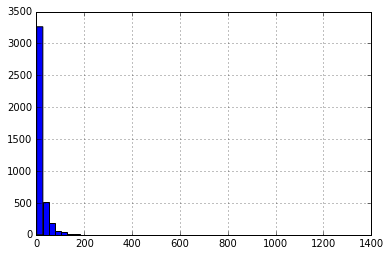

In [13]:
votes.groupby('Hashed IP Address').count()['Vote ID'].hist(bins=50)

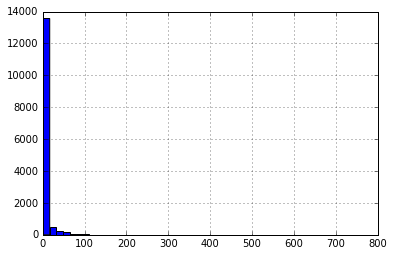

In [15]:
votes.groupby('Session ID').count()['Vote ID'].hist(bins=50)

In [17]:
data = votes[['Winner ID', 'Loser ID', 'Hashed IP Address']].copy()
data.head()

,Winner ID,Loser ID,Hashed IP Address
0,26147,26162,a1edf431db337a38948276a3331cd3b3
1,26158,26147,a1edf431db337a38948276a3331cd3b3
2,26164,26149,a1edf431db337a38948276a3331cd3b3
3,26157,26143,a1edf431db337a38948276a3331cd3b3
4,26147,26151,a1edf431db337a38948276a3331cd3b3


In [18]:
data['value'] = (data['Winner ID'] > data['Loser ID']).apply(int)
data.head()

,Winner ID,Loser ID,Hashed IP Address,value
0,26147,26162,a1edf431db337a38948276a3331cd3b3,0
1,26158,26147,a1edf431db337a38948276a3331cd3b3,1
2,26164,26149,a1edf431db337a38948276a3331cd3b3,1
3,26157,26143,a1edf431db337a38948276a3331cd3b3,1
4,26147,26151,a1edf431db337a38948276a3331cd3b3,0


In [19]:
data['bigIndex'] = data[['Winner ID', 'Loser ID']].apply(max, axis=1)
data['smallIndex'] = data[['Winner ID', 'Loser ID']].apply(min, axis=1)
data.head()

,Winner ID,Loser ID,Hashed IP Address,value,bigIndex,smallIndex
0,26147,26162,a1edf431db337a38948276a3331cd3b3,0,26162,26147
1,26158,26147,a1edf431db337a38948276a3331cd3b3,1,26158,26147
2,26164,26149,a1edf431db337a38948276a3331cd3b3,1,26164,26149
3,26157,26143,a1edf431db337a38948276a3331cd3b3,1,26157,26143
4,26147,26151,a1edf431db337a38948276a3331cd3b3,0,26151,26147


In [20]:
data['userId'] = data['Hashed IP Address']

In [21]:
# data['smallIndex'] -= data['smallIndex'].min()
# data['bigIndex'] -= data['bigIndex'].min()

In [22]:
item_map = {}
for i, item_id in enumerate(ideas['Idea ID'].sort_values()): 
    item_map[item_id] = i
    
text_map = {}
id_to_text = ideas.set_index('Idea ID')['Idea Text']
for i, item_id in enumerate(ideas['Idea ID']):
    text_map[i] = id_to_text[item_id]

In [23]:
pd.DataFrame.from_dict(item_map, orient='index').to_csv('727_item_map.csv', header=False)

In [24]:
pd.DataFrame.from_dict(text_map, orient='index').to_csv('727_text_map.csv', header=False)

In [25]:
for item in item_map:
    data.loc[data['smallIndex'] == item, 'smallIndex'] = item_map[item]
    data.loc[data['bigIndex'] == item, 'bigIndex'] = item_map[item]

In [26]:
data.head()

,Winner ID,Loser ID,Hashed IP Address,value,bigIndex,smallIndex,userId
0,26147,26162,a1edf431db337a38948276a3331cd3b3,0,19,4,a1edf431db337a38948276a3331cd3b3
1,26158,26147,a1edf431db337a38948276a3331cd3b3,1,15,4,a1edf431db337a38948276a3331cd3b3
2,26164,26149,a1edf431db337a38948276a3331cd3b3,1,21,6,a1edf431db337a38948276a3331cd3b3
3,26157,26143,a1edf431db337a38948276a3331cd3b3,1,14,0,a1edf431db337a38948276a3331cd3b3
4,26147,26151,a1edf431db337a38948276a3331cd3b3,0,8,4,a1edf431db337a38948276a3331cd3b3


In [28]:
data[['smallIndex', 'bigIndex', 'value', 'userId']].to_csv('727_dat.csv', index=False, header=False)
pd.read_csv('727_dat.csv', header=None)

,0,1,2,3
0,4,19,0,a1edf431db337a38948276a3331cd3b3
1,4,15,1,a1edf431db337a38948276a3331cd3b3
2,6,21,1,a1edf431db337a38948276a3331cd3b3
3,0,14,1,a1edf431db337a38948276a3331cd3b3
4,4,8,0,a1edf431db337a38948276a3331cd3b3
5,0,20,0,a1edf431db337a38948276a3331cd3b3
6,6,16,0,a1edf431db337a38948276a3331cd3b3
7,10,17,1,a1edf431db337a38948276a3331cd3b3
8,4,5,0,a1edf431db337a38948276a3331cd3b3
9,8,9,0,a1edf431db337a38948276a3331cd3b3
